# Explore here

In [100]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [101]:
total_data.info() #9 variables (columnas) y 768 observaciones. Todas las variables son numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
total_data.isnull().sum() #No tiene datos nulos el dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

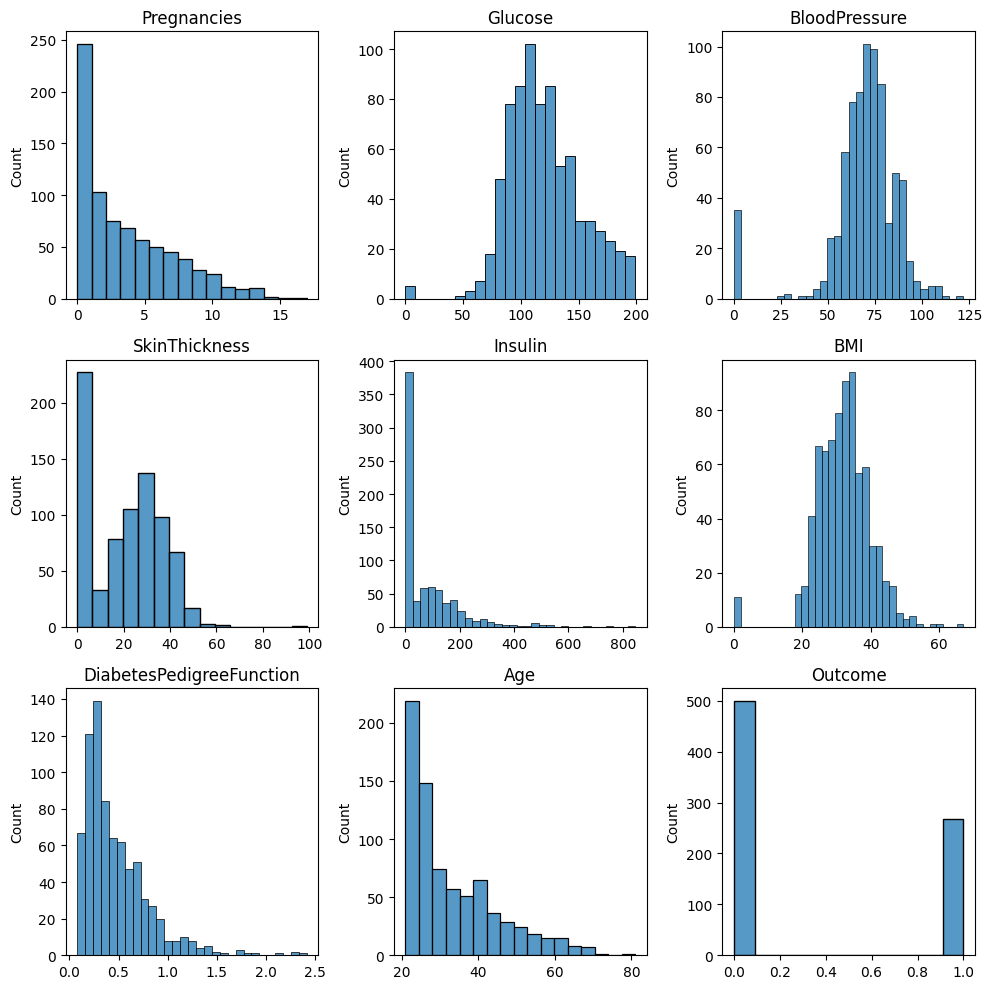

In [103]:
#Graficamos las variables más relevantes categóricas: job, marital, education, default, housing, loan
fig, axis = plt.subplots(3,3, figsize=(10,10))

sns.histplot(data=total_data["Pregnancies"], ax=axis[0,0]).set_xlabel("")
axis[0,0].set_title("Pregnancies")
sns.histplot(data=total_data["Glucose"], ax=axis[0,1]).set_xlabel("")
axis[0,1].set_title("Glucose")
sns.histplot(data=total_data["BloodPressure"], ax=axis[0,2]).set_xlabel("")
axis[0,2].set_title("BloodPressure")
sns.histplot(data=total_data["SkinThickness"], ax=axis[1,0]).set_xlabel("")
axis[1,0].set_title("SkinThickness")
sns.histplot(data=total_data["Insulin"], ax=axis[1,1]).set_xlabel("")
axis[1,1].set_title("Insulin")
sns.histplot(data=total_data["BMI"], ax=axis[1,2]).set_xlabel("")
axis[1,2].set_title("BMI")
sns.histplot(data=total_data["DiabetesPedigreeFunction"], ax=axis[2,0]).set_xlabel("")
axis[2,0].set_title("DiabetesPedigreeFunction")
sns.histplot(data=total_data["Age"], ax=axis[2,1]).set_xlabel("")
axis[2,1].set_title("Age")
sns.histplot(data=total_data["Outcome"], ax=axis[2,2]).set_xlabel("")
axis[2,2].set_title("Outcome")



plt.tight_layout()
plt.show()

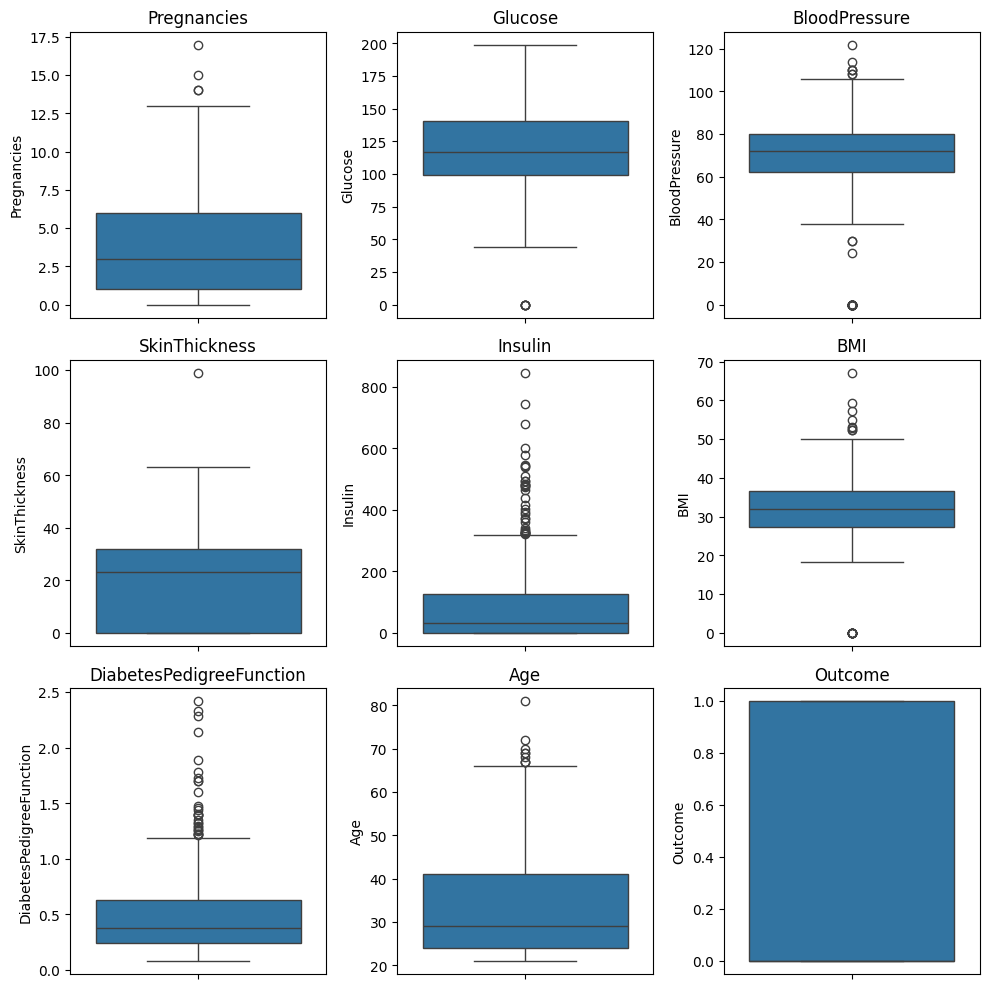

In [104]:
#Boxplot
fig, axis = plt.subplots(3,3, figsize=(10,10))

sns.boxplot(data=total_data["Pregnancies"], ax=axis[0,0]).set_xlabel("")
axis[0,0].set_title("Pregnancies")
sns.boxplot(data=total_data["Glucose"], ax=axis[0,1]).set_xlabel("")
axis[0,1].set_title("Glucose")
sns.boxplot(data=total_data["BloodPressure"], ax=axis[0,2]).set_xlabel("")
axis[0,2].set_title("BloodPressure")
sns.boxplot(data=total_data["SkinThickness"], ax=axis[1,0]).set_xlabel("")
axis[1,0].set_title("SkinThickness")
sns.boxplot(data=total_data["Insulin"], ax=axis[1,1]).set_xlabel("")
axis[1,1].set_title("Insulin")
sns.boxplot(data=total_data["BMI"], ax=axis[1,2]).set_xlabel("")
axis[1,2].set_title("BMI")
sns.boxplot(data=total_data["DiabetesPedigreeFunction"], ax=axis[2,0]).set_xlabel("")
axis[2,0].set_title("DiabetesPedigreeFunction")
sns.boxplot(data=total_data["Age"], ax=axis[2,1]).set_xlabel("")
axis[2,1].set_title("Age")
sns.boxplot(data=total_data["Outcome"], ax=axis[2,2]).set_xlabel("")
axis[2,2].set_title("Outcome")



plt.tight_layout()
plt.show()

In [105]:
#Eliminamos los valores 0 de las variables BMI, Glucose y BloodPressure porque una persona no puede tener nivel 0 en cualquiera de estas tres variables

total_data = total_data[total_data["BMI"] != 0]
total_data = total_data[total_data["Glucose"] != 0]
total_data = total_data[total_data["BloodPressure"] != 0]

Vamos a comparar cada variable con la relación que tiene con el Outcome para decidir si podemos prescindir de alguna o no.

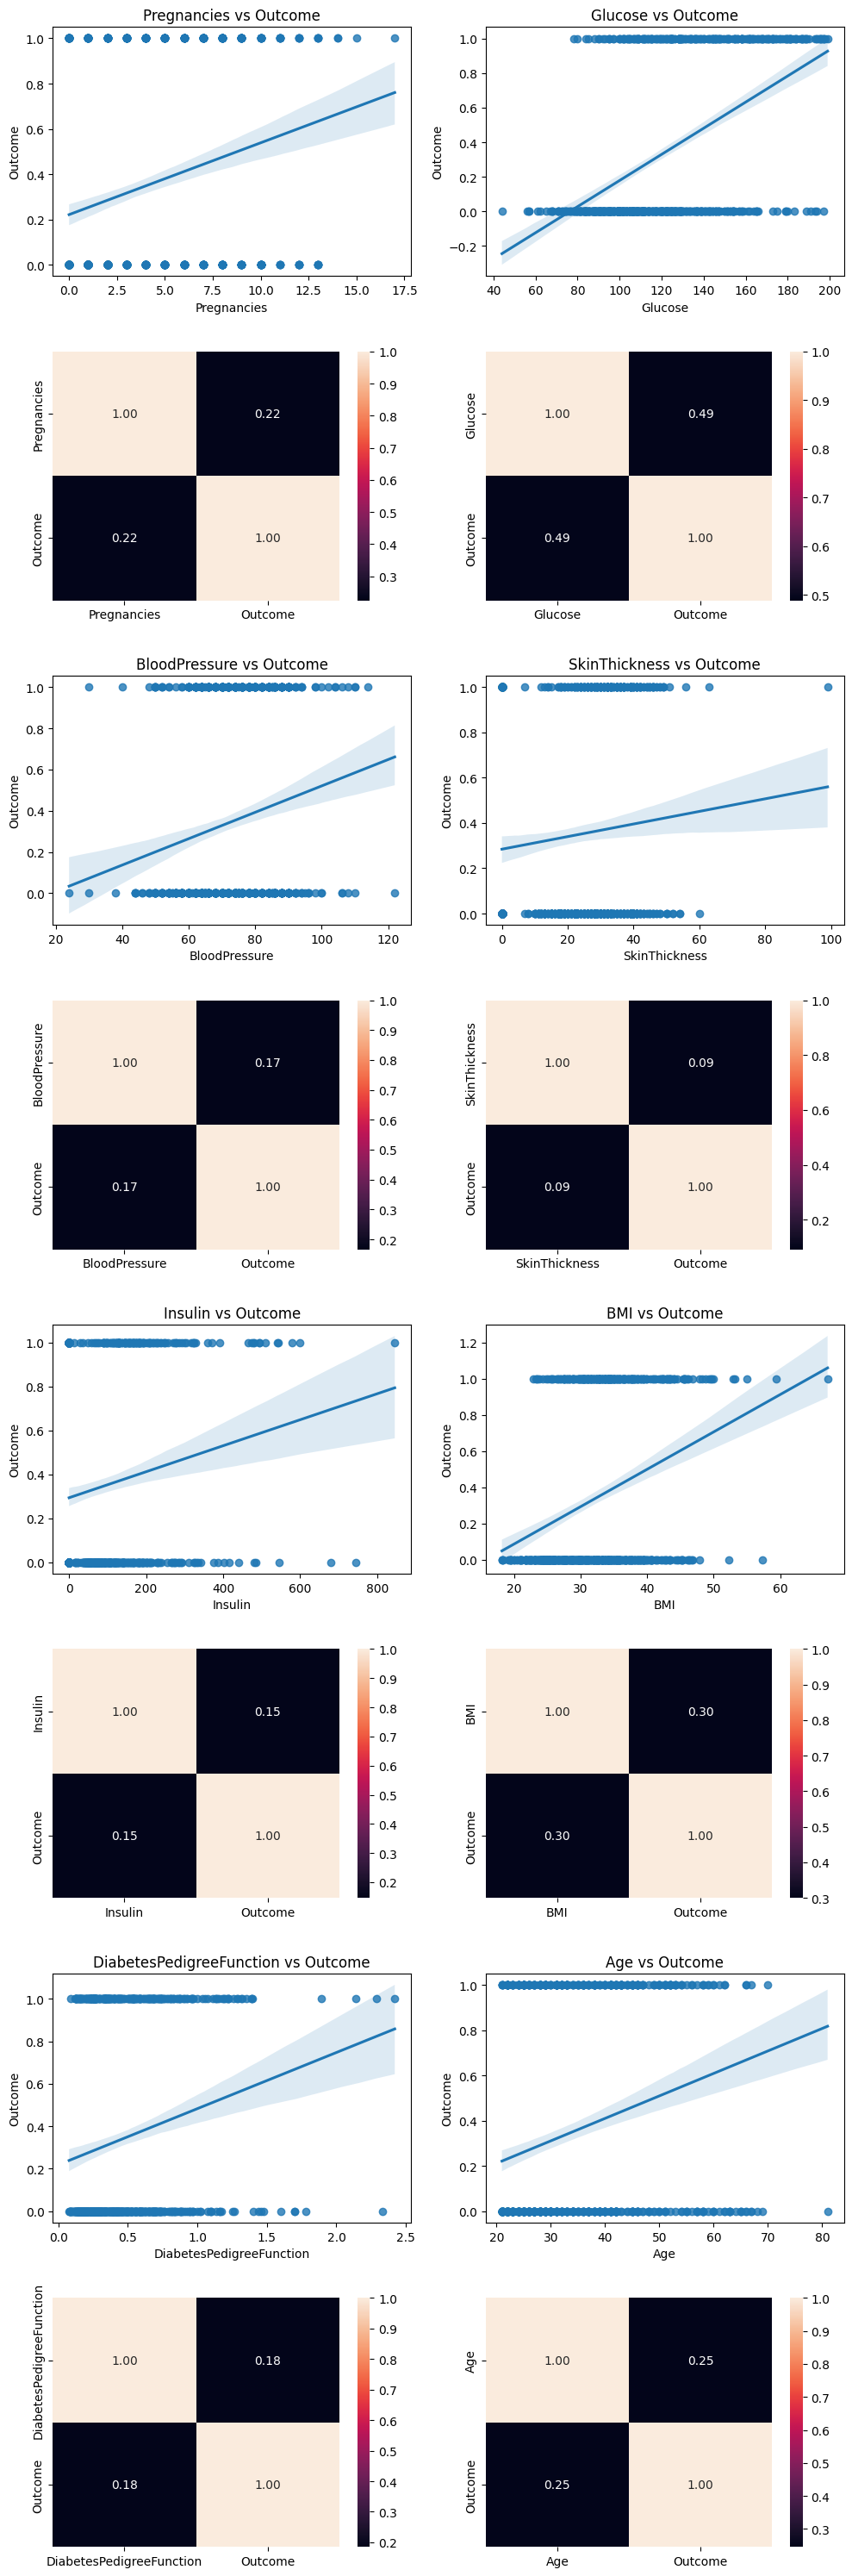

In [106]:
#Análisis numérico-numérico
fig, axis = plt.subplots(8,2, figsize=(10,30))

#Pregnancies
sns.regplot(ax= axis[0,0], data=total_data, x="Pregnancies", y="Outcome")
axis[0,0].set_title("Pregnancies vs Outcome")
sns.heatmap(total_data[["Pregnancies","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1,0])

#Glucose
sns.regplot(ax= axis[0,1], data=total_data, x="Glucose", y="Outcome")
axis[0,1].set_title("Glucose vs Outcome")
sns.heatmap(total_data[["Glucose","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1,1])

#BloodPressure
sns.regplot(ax= axis[2,0], data=total_data, x="BloodPressure", y="Outcome")
axis[2,0].set_title("BloodPressure vs Outcome")
sns.heatmap(total_data[["BloodPressure","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3,0])

#SkinThickness
sns.regplot(ax= axis[2,1], data=total_data, x="SkinThickness", y="Outcome")
axis[2,1].set_title("SkinThickness vs Outcome")
sns.heatmap(total_data[["SkinThickness","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3,1])

#Insulin
sns.regplot(ax= axis[4,0], data=total_data, x="Insulin", y="Outcome")
axis[4,0].set_title("Insulin vs Outcome")
sns.heatmap(total_data[["Insulin","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[5,0])

#BMI
sns.regplot(ax= axis[4,1], data=total_data, x="BMI", y="Outcome")
axis[4,1].set_title("BMI vs Outcome")
sns.heatmap(total_data[["BMI","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[5,1])

#DiabetesPedigreeFunction
sns.regplot(ax= axis[6,0], data=total_data, x="DiabetesPedigreeFunction", y="Outcome")
axis[6,0].set_title("DiabetesPedigreeFunction vs Outcome")
sns.heatmap(total_data[["DiabetesPedigreeFunction","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[7,0])

#Age
sns.regplot(ax= axis[6,1], data=total_data, x="Age", y="Outcome")
axis[6,1].set_title("Age vs Outcome")
sns.heatmap(total_data[["Age","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[7,1])

plt.tight_layout()
plt.show()

Podemos prescindir de las variables BloodPressure y SkinThickness ya que tienen muy poca correlación con la variable objetivo

In [107]:
total_data.drop(["BloodPressure"], axis=1, inplace=True)
total_data.drop(["SkinThickness"], axis=1, inplace=True)

total_data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


Normalizamos los valores de las variables

In [108]:
from sklearn.model_selection import train_test_split

num_variables = ["Pregnancies", "Glucose", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

X = total_data.drop(["Outcome"], axis=1)[num_variables]
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
346,1,139,83,28.7,0.654,22
553,1,88,44,29.9,0.422,23
590,11,111,0,46.8,0.925,45
36,11,138,0,33.2,0.420,35
399,3,193,0,34.9,0.241,25


In [109]:
#Escalado de las variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

scaler.fit(X_test)
X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

Árboles de decisión para clasificación

<Axes: >

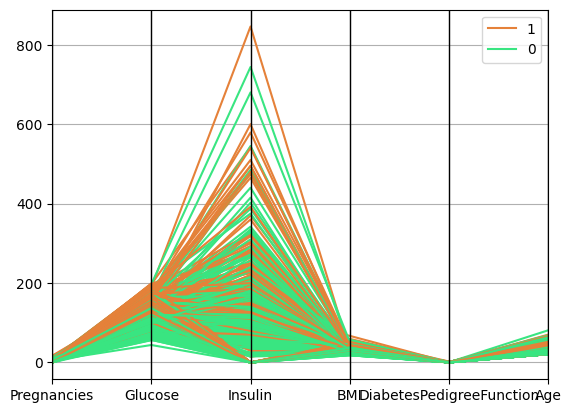

In [110]:
pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581"))

Inicialización y entrenamiento del modelo

In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(random_state = 42, min_samples_leaf=10, max_depth=4)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

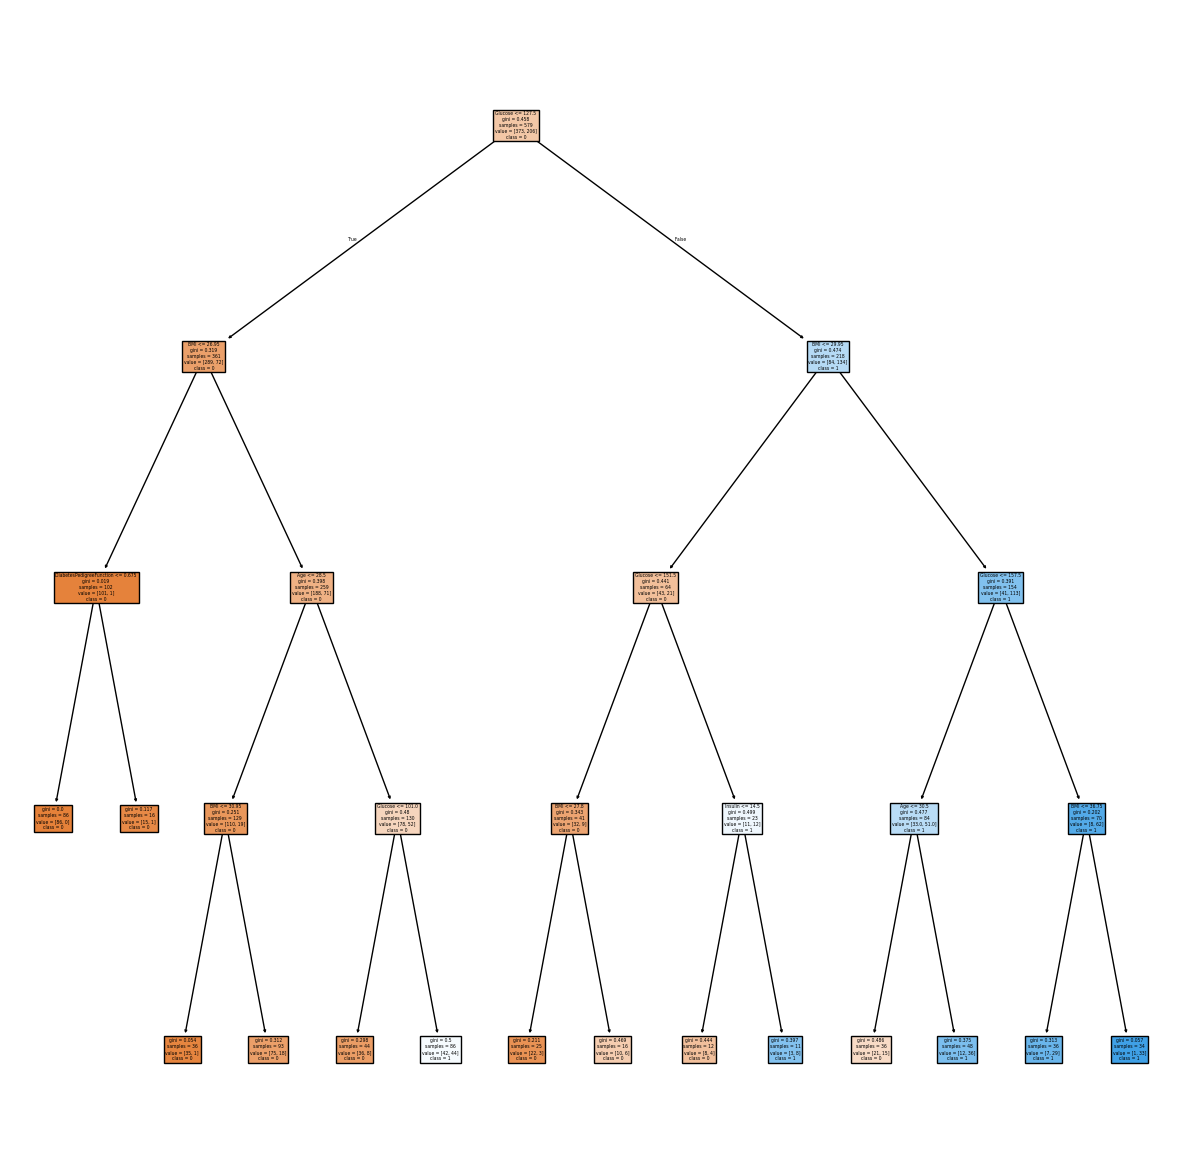

In [112]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)

plt.show()

In [113]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred_test = model.predict(X_test)
y_pred_test


array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [114]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,

El modelo tien buena precisión pero está lejos de ser perfecta

In [115]:
accuracy_score(y_test, y_pred_test)

0.8068965517241379

In [116]:
#Métricas

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.8068965517241379
F1 score Test:  0.8068965517241379
Precision Test:  0.8068965517241379
Recall Test:  0.8068965517241379
Accuracy Train:  0.7910189982728842
F1 score Train:  0.7910189982728842
Precision Train:  0.7910189982728842
Recall Train:  0.7910189982728842


In [117]:
print(classification_report(y_test, y_pred_test, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       102
           1       0.65      0.77      0.70        43

    accuracy                           0.81       145
   macro avg       0.77      0.80      0.78       145
weighted avg       0.82      0.81      0.81       145



Vamos a desglosar esta tabla:

Precision: acierta un 89% de las veces en predecir que la observación es de clase 0 mientras que solo lo hace un 65% cuando es clase 1 (la predicción es baja para acertar clase 1)

Recall: el modelo detecta el 82% de los verdaderos 0 y un 70% de los verdaderos 1

F1-score: el rendimiento más flojo es para la clase 1 (un 70% comparado con un 86%)

Support: tiene una cantidad de 102 observaciones reales para la clase 0 y 43 observaciones reales para la clase 1

En conclusión, mi modelo funciona mejor prediciendo la clase 0 que la clase 1. Porque aunque detecta bien la clase 1 (recall=75%) falla bastante en predecirla (precision=58%). Predice la clase 1 de más de lo que es

In [118]:
#Métricas
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("MSE Test: ", mse_test)
print("RMSE Test: ", rmse_test)

MSE Test:  0.19310344827586207
RMSE Test:  0.4394353744020411


RANDOM FOREST

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


model_2 = RandomForestClassifier(n_estimators=80, random_state=42)

model_2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, random_state=42)

In [120]:
y_pred_test_2 = model_2.predict(X_test)
y_pred_test_2

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [121]:
y_pred_train_2 = model_2.predict(X_train)
y_pred_train_2

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,

In [122]:
print(classification_report(y_test, y_pred_test_2, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       102
           1       0.69      0.72      0.70        43

    accuracy                           0.82       145
   macro avg       0.78      0.79      0.79       145
weighted avg       0.82      0.82      0.82       145



Vemos como algunos valores de las métricas aumentan pero también otros disminuyen. Podríamos decir que este test de bosque sigiloso no ha sido un éxito total comparado con el diagrama de árbol del anterior ejercicio.

In [123]:
from pickle import dump

dump(model, open("random_forest_classifier_default_42.sav", "wb"))